In [5]:
# Importing libraries
import os
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import mean_absolute_error

In [2]:
# Loading the model
age_model = cv2.dnn.readNetFromCaffe("age.prototxt", "dex_chalearn_iccv2015.caffemodel")

In [50]:
# Define a function for the prediction step
def get_prediction(img_path):
    """This function takes in an image and returns the predicted age."""

    img = cv2.imread(img_path)

    # Display the image
    plt.imshow(img[:,:,::-1])
    plt.show()

    # Preprocess the image
    img_blob = cv2.dnn.blobFromImage(img)
    
    # Set the input to the model
    age_model.setInput(img_blob)
    
    # Get the prediction from the model
    age_proba = age_model.forward()

    # Calculate age expected value
    output_indexes = np.array([i for i in range(0, 101)])
    prediction = round(np.sum(age_proba * output_indexes), 2)

    print(f"Predicted age: {prediction}")

Predicted age: 16.72


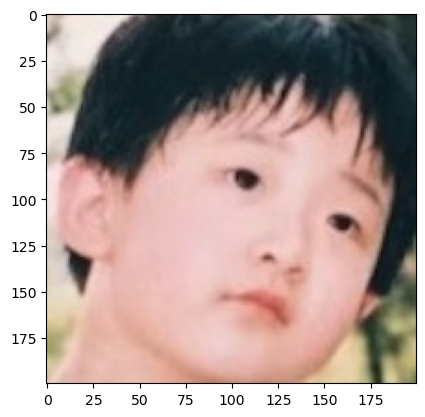

In [47]:
get_prediction("../../02_Data/Test Photos/ellensister-child2.jpg")

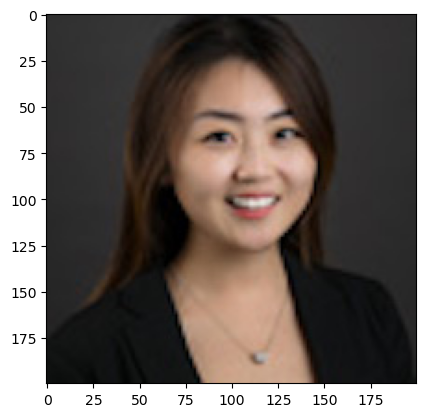

Predicted age: 22.39


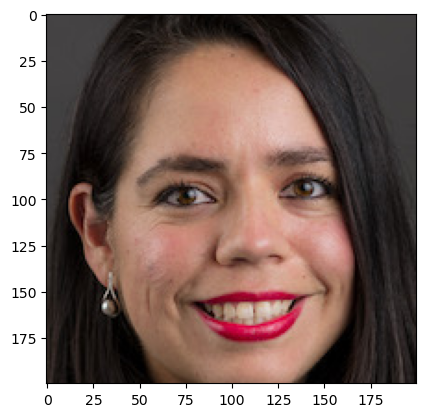

Predicted age: 36.59


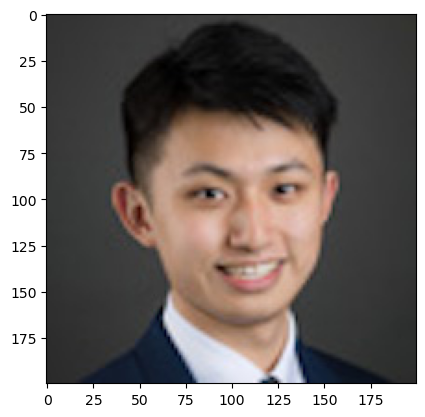

Predicted age: 25.41


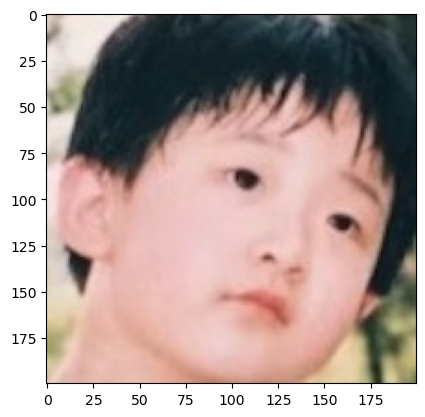

Predicted age: 16.72


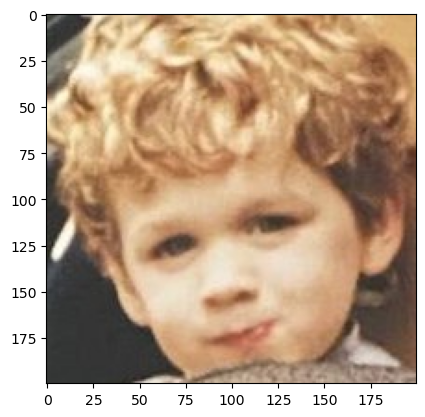

Predicted age: 15.65


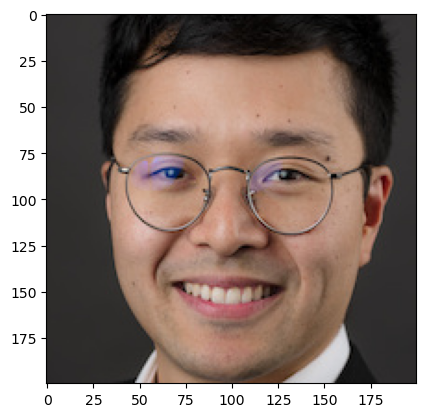

Predicted age: 27.06


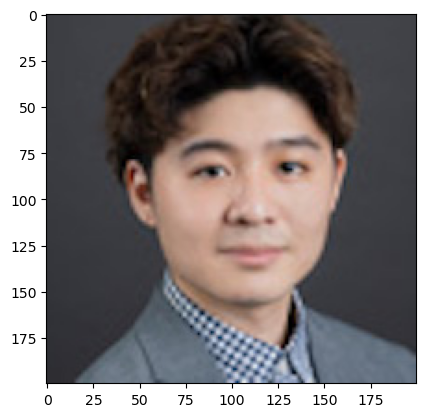

Predicted age: 23.04


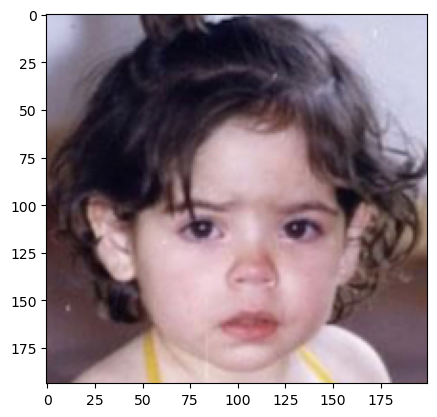

Predicted age: 10.58


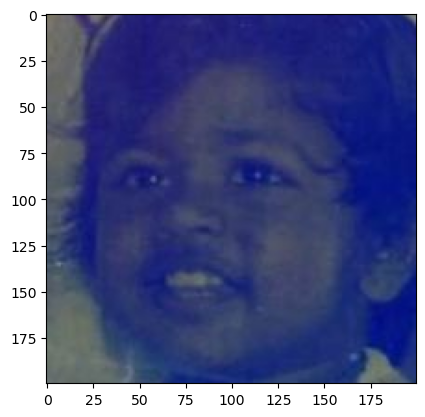

Predicted age: 24.04


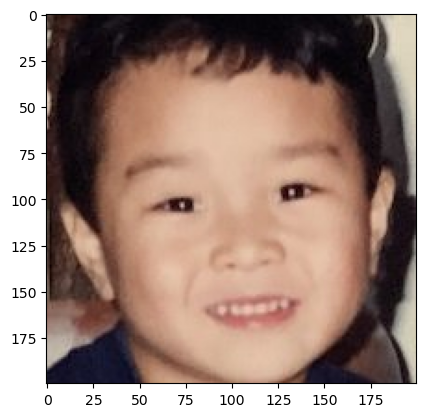

Predicted age: 10.75


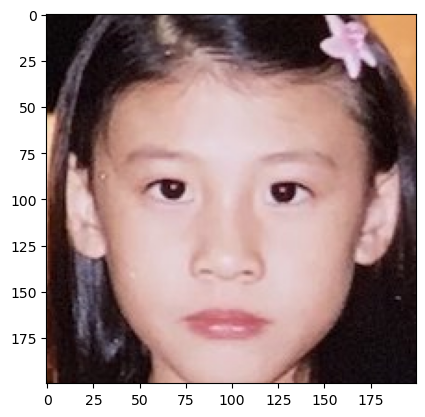

Predicted age: 12.69


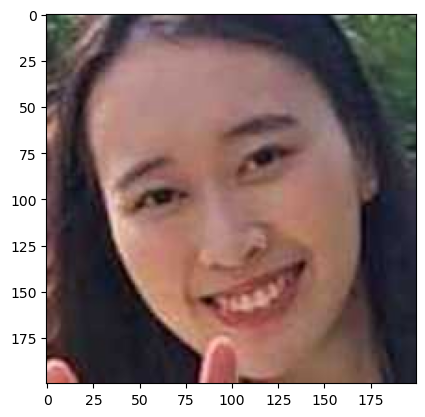

Predicted age: 20.27


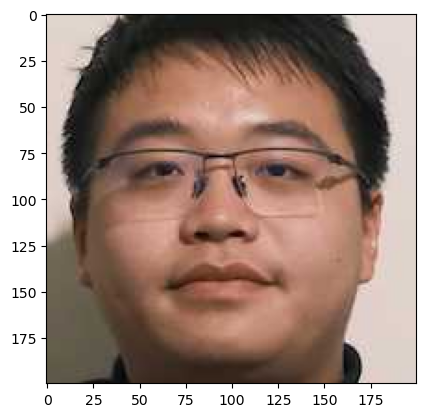

Predicted age: 21.04


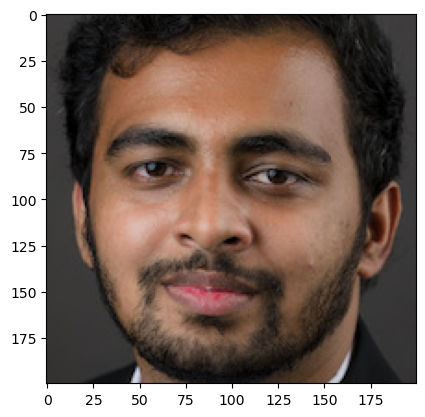

Predicted age: 29.73


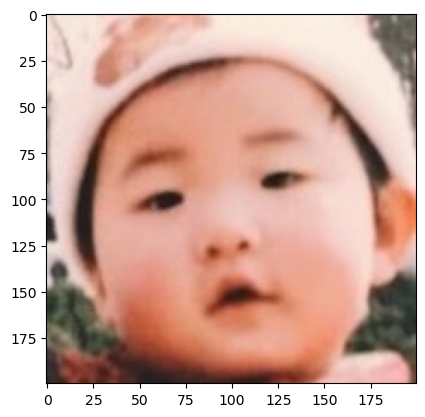

Predicted age: 12.9


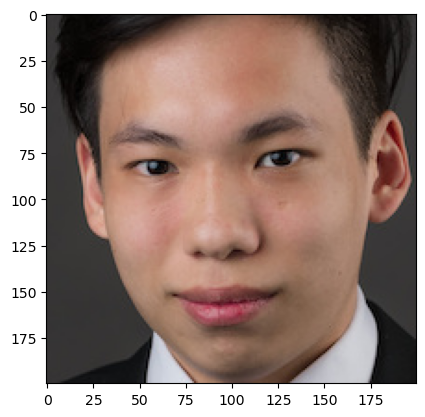

Predicted age: 17.61


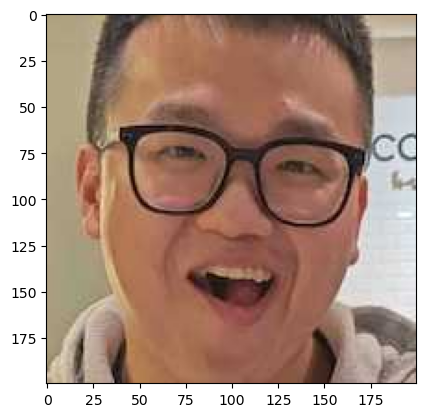

Predicted age: 31.24


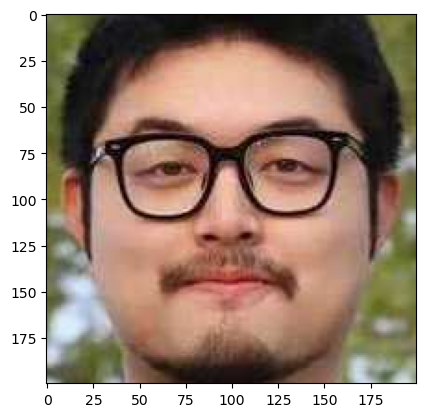

Predicted age: 26.02


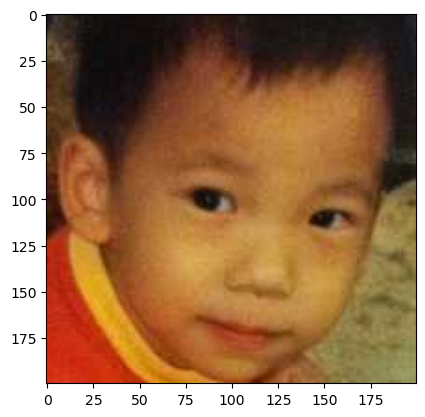

Predicted age: 9.91


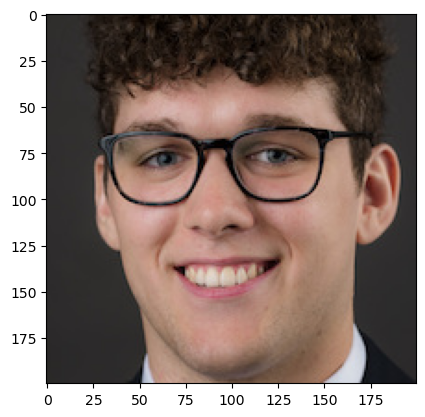

Predicted age: 21.03


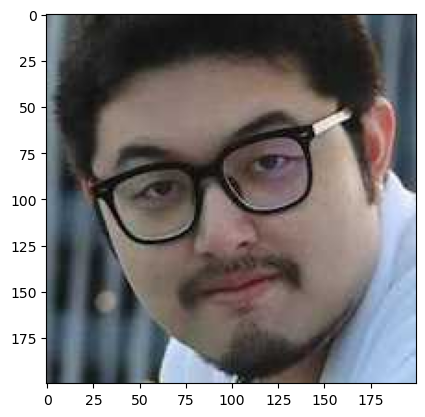

Predicted age: 27.84


In [52]:
folder_path = "../../02_Data/Test Photos/"

# Loop over all files in the directory
for filename in os.listdir(folder_path):
    # Construct full file path
    file_path = os.path.join(folder_path, filename)
    
    # You might want to add a check here to only process images
    if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Apply your function
        get_prediction(file_path)